# Simple Graph of CZE and the NR Method applied to the model

Notice the points that do not lie on the graph

Test Newton-Raphson= 5.699374501264142
1 Newton-Raphson= 0.07336790674476655
2 Newton-Raphson= 0.08803102329775445
3 Newton-Raphson= 0.10312050879917331
4 Newton-Raphson= 0.11866477812468616
5 Newton-Raphson= 0.13469533068570752
6 Newton-Raphson= 0.1512472272117882
7 Newton-Raphson= 0.1683596642657141
8 Newton-Raphson= 0.1860766719296428
9 Newton-Raphson= 0.20444796826954328
10 Newton-Raphson= 0.22353001552639196
11 Newton-Raphson= 0.24338733896445533
12 Newton-Raphson= 0.26409419219992736
13 Newton-Raphson= 0.285736686222317
14 Newton-Raphson= 0.308415549001124
15 Newton-Raphson= 0.33224975815368796
16 Newton-Raphson= 0.35738140704924076
17 Newton-Raphson= 0.38398235389117724
18 Newton-Raphson= 0.41226351674993633
19 Newton-Raphson= 0.4424882164153808
20 Newton-Raphson= 0.47499193627935493
21 Newton-Raphson= 0.5102126954876159
22 Newton-Raphson= 0.5487398996738457
23 Newton-Raphson= 0.5913974708029135
24 Newton-Raphson= 0.6393959340612044
25 Newton-Raphson= 0.6946389390508637
26 Newto

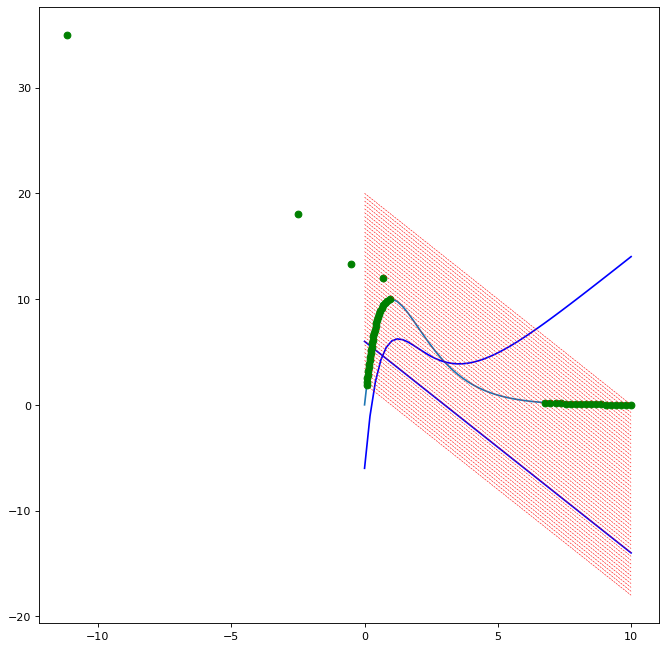

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt

plt.figure(figsize=(10,10), dpi=80)

c1 = 10
c2 = 1
k = 2
dh = 3
e = math.e

f = lambda x: (c1/c2)*x*( e**( 1-(x/c2)) )
g = lambda x: -k*x + k*dh
f_prime = lambda x: (c1/c2)*( e**( 1-(x/c2)) ) - ( (c1*x)/(c2**2) )*( e**(1-(x/c2)) )
g_prime = lambda x: -k
h = lambda x: f(x) - g(x)
h_prime = lambda x: f_prime(x) - g_prime(x)
newton_raphson = 2.0 - (h(2.0))/(h_prime(2.0))
for _ in range(10):
    newton_raphson = newton_raphson - (h(newton_raphson))/(h_prime(newton_raphson))

    
print("Test Newton-Raphson=", newton_raphson)

import scipy.optimize as opt

xx = np.linspace(0,10)
CZM = (c1/c2) * xx * e**(1 - (xx/c2))
MR = -k*xx + k*(dh)
plt.plot(xx,CZM)
plt.plot(xx, MR, color = 'blue')
plt.plot(xx, CZM-MR, color = 'blue')


rank = 0
for r in np.linspace(1,10,50):
    MR = -k*xx + k*(r)
    plt.plot(xx,MR, color='red', linestyle='dashed', linewidth=0.5)
    
    g = lambda x: -k*x + k*r
    h = lambda x: f(x) - g(x)
    
    for _ in range(10):
        newton_raphson = newton_raphson - (h(newton_raphson))/(h_prime(newton_raphson)) 
    
    rank += 1
    print(rank, "Newton-Raphson=", newton_raphson)
    plt.plot(newton_raphson,g(newton_raphson), 'go')

plt.show()

# Graph of CZE, dCZE, Mat Response, and P-P'

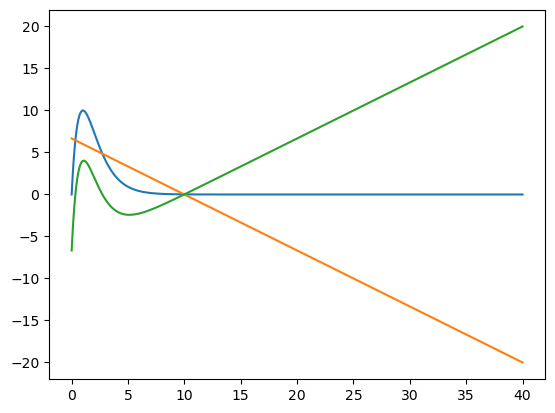

In [2]:
xs = np.linspace(0,40,1000)
ys = (c1/c2)*xs*( e**( 1-(xs/c2)) )

dys = (c1/c2)*( e**( 1-(xs/c2)) ) - ( (c1*xs)/(c2**2) )*( e**(1-(xs/c2)) )
iys = -c1 * (c2 + xs) * e**(1.0-xs/c2) + 0.5*k*2**(xs-dh)

by = (2/3)*10 - (2/3)*xs

plt.plot(xs,ys)
#plt.plot(xs,dys)
plt.plot(xs,by)
plt.plot(xs, ys-by)
#plt.plot(xs, iys)

### Utilizing the unique root of the problem to apply this to a minimization problem

Acurate Results

In [3]:
#import scipy.integrate as integrate

minderv = lambda x : h(x)
minint = lambda x : -c1*e**(1 - (x/c2) )*(c2 + x) + (k/2)*x**2 - k*(dh)*x
opt.minimize(minint, 0)



  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -27.901214196530454
        x: [ 2.617e-01]
      nit: 4
      jac: [ 7.153e-06]
 hess_inv: [[ 5.759e-02]]
     nfev: 12
     njev: 6

In [6]:
rank = 0
for r in np.linspace(1,10,50):
    MR = -k*xx + k*(r)
    # plt.plot(xx,MR, color='red', linestyle='dashed', linewidth=0.5)
    
    g = lambda x: -k*x + k*r
    h = lambda x: f(x) - g(x)
    
    rank += 1
    print(rank)

    
    minres = opt.minimize(minint, 0)
    
    print(minres)
    print("\n")
    
    
    #print(rank, "Newton-Raphson=", newton_raphson)

1
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -27.901214196530454
        x: [ 2.617e-01]
      nit: 4
      jac: [ 7.153e-06]
 hess_inv: [[ 5.759e-02]]
     nfev: 12
     njev: 6


2
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -27.901214196530454
        x: [ 2.617e-01]
      nit: 4
      jac: [ 7.153e-06]
 hess_inv: [[ 5.759e-02]]
     nfev: 12
     njev: 6


3
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -27.901214196530454
        x: [ 2.617e-01]
      nit: 4
      jac: [ 7.153e-06]
 hess_inv: [[ 5.759e-02]]
     nfev: 12
     njev: 6


4
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -27.901214196530454
        x: [ 2.617e-01]
      nit: 4
      jac: [ 7.153e-06]
 hess_inv: [[ 5.759e-02]]
     nfev: 12
     njev: 6


5
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -

In [7]:
c1 = 3.0
c2 = 2.0
k = 1.0
dh = 4.0
e = math.e

f = lambda x: (c1/c2)*x*( e**( 1-(x/c2)) )
g = lambda x: -k*x + k*dh
f_prime = lambda x: (c1/c2)*( e**( 1-(x/c2)) ) - ( (c1*x)/(c2**2) )*( e**(1-(x/c2)) )
g_prime = lambda x: -k
h = lambda x: f(x) - g(x)
h_prime = lambda x: f_prime(x) - g_prime(x)
newton_raphson = 2.8 - (h(2.8))/(h_prime(2.8))
for _ in range(10):
    newton_raphson = newton_raphson - (h(newton_raphson))/(h_prime(newton_raphson))

    
print("Test Newton-Raphson=", newton_raphson)

Test Newton-Raphson= 1.2620986234236644
